In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
df=pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [44]:
df.shape

(150, 5)

In [45]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot:>

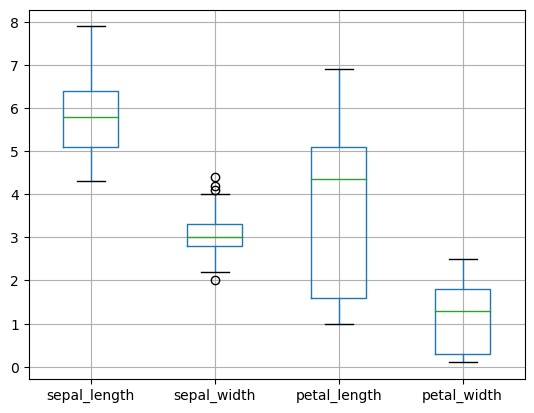

In [46]:
# plt.boxplot(df.sepal_length)
# plt.show()
df.boxplot()

In [47]:
Q1 = np.percentile(df.sepal_width, 25,interpolation = 'midpoint')
Q3 = np.percentile(df.sepal_width, 75,interpolation = 'midpoint')
IQR = Q3 - Q1
q_hi=Q3+1.5*IQR
q_low=Q1-1.5*IQR     
df_filtered = df[(df.sepal_width< q_hi) & (df.sepal_width> q_low)]

# from scipy import stats
# df1=df[(np.abs(stats.zscore(df.drop('species', axis=1))) < 3).all(axis=1)]

<AxesSubplot:>

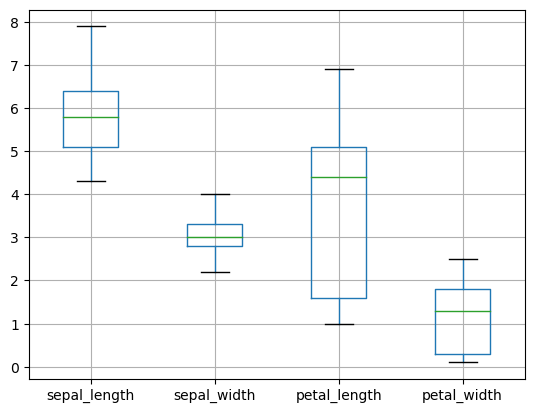

In [48]:
df_filtered.boxplot()

In [49]:
df_filtered.shape

(146, 5)

In [50]:
dummy_columns=pd.get_dummies(df_filtered.species)
dummy_columns

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [51]:
df1=pd.concat([df_filtered,dummy_columns],axis="columns")
df1

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0,0,1
146,6.3,2.5,5.0,1.9,virginica,0,0,1
147,6.5,3.0,5.2,2.0,virginica,0,0,1
148,6.2,3.4,5.4,2.3,virginica,0,0,1


In [52]:
df2=df1.drop(['species'],axis="columns")
df2

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [53]:
df2.describe()

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,5.856849,3.036986,3.807534,1.219863,0.321918,0.335616,0.342466
std,0.834093,0.395145,1.757117,0.760365,0.468820,0.473831,0.476168
min,4.300000,2.200000,1.000000,0.100000,0.000000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.000000,6.900000,2.500000,1.000000,1.000000,1.000000


In [54]:
df3 = df2.apply(lambda iterator: ((iterator - iterator.mean())/iterator.std()).round(2))

In [55]:
df3

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
0,-0.91,1.17,-1.37,-1.34,1.45,-0.71,-0.72
1,-1.15,-0.09,-1.37,-1.34,1.45,-0.71,-0.72
2,-1.39,0.41,-1.43,-1.34,1.45,-0.71,-0.72
3,-1.51,0.16,-1.31,-1.34,1.45,-0.71,-0.72
4,-1.03,1.42,-1.37,-1.34,1.45,-0.71,-0.72
...,...,...,...,...,...,...,...
145,1.01,-0.09,0.79,1.42,-0.69,-0.71,1.38
146,0.53,-1.36,0.68,0.89,-0.69,-0.71,1.38
147,0.77,-0.09,0.79,1.03,-0.69,-0.71,1.38
148,0.41,0.92,0.91,1.42,-0.69,-0.71,1.38


In [ ]:


from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(df3, classes)